In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
hexsha_df = pd.read_csv('../../../../sample_data/data/camel_in_spiral/hexsha_filename_camel.txt',
                        header=None,
                        names=["id","commit_hash", "before_filename", "after_filename","change_type"]
                        )

In [16]:
def excute(i):
    dic = {}
    with open('../../../../sample_data/data/camel_in_spiral/snippet_camel_'+str(i)+'.txt') as f:
        while True:
            line = f.readline()
            if line == '':
                break
            tmp = line.split('\t')
            # if tmp[1].strip() != '':
            #     dic[tmp[0]] = len(tmp[1:])
            dic[tmp[0]] = len(tmp[1:])

    id_list = []
    id2_list = []
    for key in dic.keys():
        tmp = key.split('-')
        id_list.append(int(tmp[0]))
        id2_list.append(int(tmp[1]))
        
    length_df = pd.DataFrame(
        data= {'id':id_list,
            'id2':id2_list,
            'snippet_length':dic.values()
            }
    )

    df = pd.merge(length_df, hexsha_df, on='id', how='left')
    df.to_csv('../label/camel_'+str(i)+'.csv')

In [8]:
for i in range(0,11):
    excute(i)

In [17]:
df_list = []
for i in range(0, 11):
    df  = pd.read_csv('../label/camel_'+str(i)+'.csv')
    df_list.append(df)

In [18]:
df_list[0]

,Unnamed: 0,id,id2,snippet_length,commit_hash,before_filename,after_filename,change_type
0,0,1,1,37,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
1,1,2,1,28,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
2,2,3,1,88,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
3,3,4,1,31,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
4,4,5,1,114,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
...,...,...,...,...,...,...,...,...
723425,723425,215351,3,16,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
723426,723426,215352,1,3,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
723427,723427,215352,2,4,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
723428,723428,215353,1,3,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M


In [19]:
df_list2 = []
for df in df_list:
    df_list2.append(df[['id', 'change_type', 'snippet_length']].groupby(['id','change_type'], as_index=False).sum())

In [20]:
df_list2[0]

,id,change_type,snippet_length
0,1,A,37
1,2,A,28
2,3,A,88
3,4,A,31
4,5,A,114
...,...,...,...
158835,215349,M,24
158836,215350,M,8
158837,215351,M,24
158838,215352,M,7


In [21]:
df_list3 = []
for i, df in enumerate(df_list2):
    df['snippet_id'] = i
    df_list3.append(df[['snippet_id','id','change_type','snippet_length']])

In [22]:
df_list3[0]

,snippet_id,id,change_type,snippet_length
0,0,1,A,37
1,0,2,A,28
2,0,3,A,88
3,0,4,A,31
4,0,5,A,114
...,...,...,...,...
158835,0,215349,M,24
158836,0,215350,M,8
158837,0,215351,M,24
158838,0,215352,M,7


In [23]:
con_df = pd.concat(df_list2, axis=0)
con_df

,id,change_type,snippet_length,snippet_id
0,1,A,37,0
1,2,A,28,0
2,3,A,88,0
3,4,A,31,0
4,5,A,114,0
...,...,...,...,...
158835,215349,M,92,10
158836,215350,M,40,10
158837,215351,M,90,10
158838,215352,M,47,10


In [24]:
con_df[['snippet_id','change_type', 'snippet_length']].groupby(['snippet_id','change_type'], as_index=False).agg(['count','mean','std','median','max','min'])

snippet_length                                        \
                                count        mean         std median    max   
snippet_id change_type                                                        
0          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183   46.926769  167.378018   11.0  33430   
           R                     4170   22.234053   61.522043    4.0   1453   
1          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183   56.422279  179.110947   17.0  33443   
           R                     4170   31.868825   76.313287    9.0   1627   
2          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183   66.355344  190.900251   24.0  33458   
           R                     4170   41.406715   90.936178   15.0   1822   
3          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183   75.679856  203.464156   30.0  33475   
           R                     4170   49.025180  103.652079   19.0   2168   
4          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183   83.833769  215.184885   36.0  33487   
           R                     4170   56.780336  117.631243   23.0   2545   
5          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183   91.535048  225.685581   41.0  33503   
           R                     4170   63.519904  129.471323   27.0   2894   
6          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183   98.913975  240.209082   45.0  33516   
           R                     4170   70.230216  142.588863   31.0   3493   
7          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183  106.256220  258.578550   50.0  33526   
           R                     4170   76.296403  153.819852   35.0   3814   
8          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183  112.668872  269.423909   54.0  33535   
           R                     4170   81.887290  164.798075   39.0   4163   
9          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183  119.272197  282.237863   59.0  33542   
           R                     4170   87.155156  174.802115   43.0   4510   
10         A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183  124.960361  287.952097   63.0  33551   
           R                     4170   91.528537  182.641427   46.0   4884   

                            
                       min  
snippet_id change_type      
0          A            12  
           M             1  
           R             1  
1          A            12  
           M             1  
           R             2  
2          A            12  
           M             1  
           R             4  
3          A            12  
           M             1  
           R             6  
4          A            12  
           M             1  
           R             7  
5          A            12  
           M             1  
           R             8  
6          A            12  
           M             1  
           R             9  
7          A            12  
           M             1  
           R            10  
8          A            12  
           M             1  
           R            11  
9          A            12  
           M             1  
           R            12  
10         A            12  
           M             1  
           R            13

In [27]:
# ソースコード片の単語数　90%ライン
target_ratio = 0.9
threshold_list = []
for i , df in enumerate(df_list2):
    sorted_df = df.sort_values('snippet_length')
    cumulative_sum = sorted_df['snippet_length'].cumsum()
    cumulative_ratio = cumulative_sum / cumulative_sum.max()

    threshold_value = sorted_df.loc[cumulative_ratio >= target_ratio, 'snippet_length'].iloc[0]
    threshold_list.append(threshold_value)
    print(str(i)+':'+str(threshold_value))

0:2726
1:2640
2:2551
3:2475
4:2455
5:2434
6:2450
7:2522
8:2504
9:2572
10:2551


In [28]:
avg = sum(threshold for threshold in threshold_list) / len(threshold_list)
avg 

2534.5454545454545

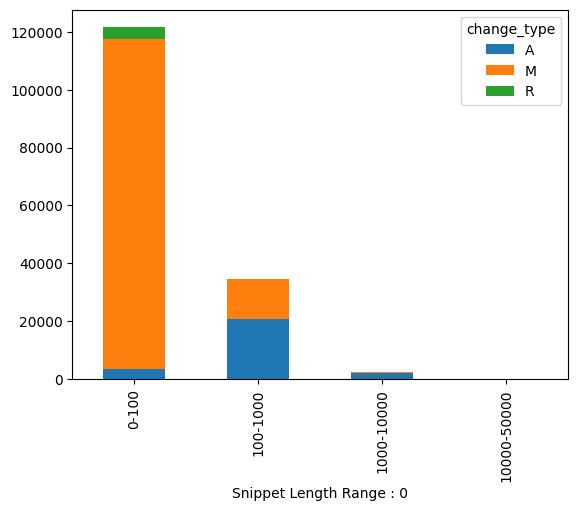

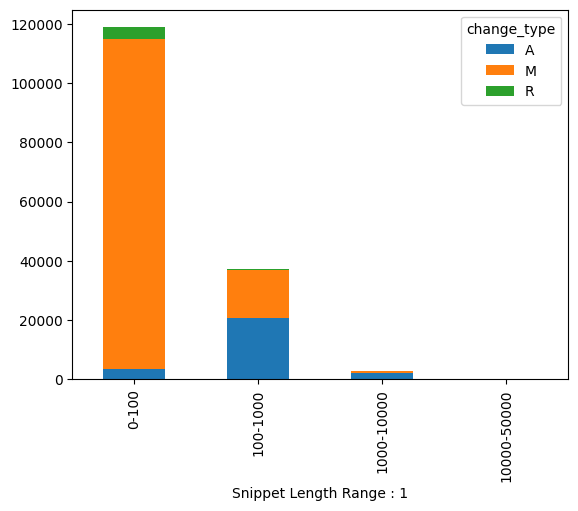

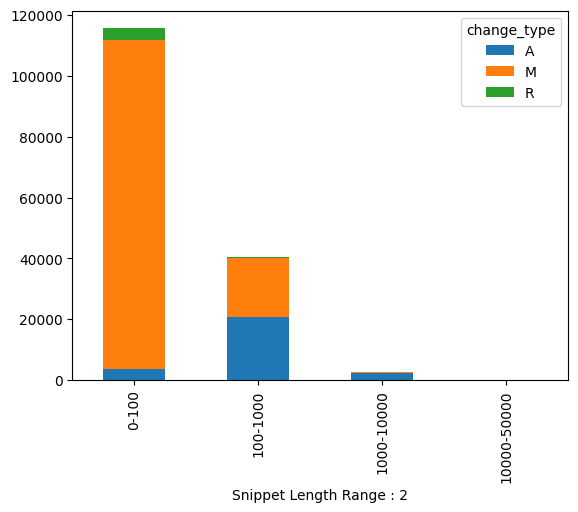

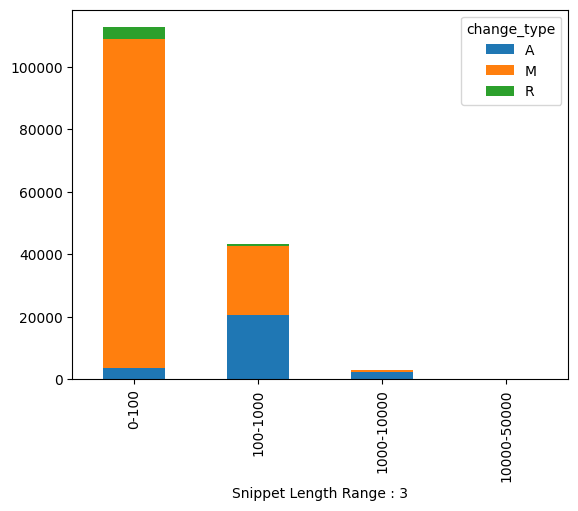

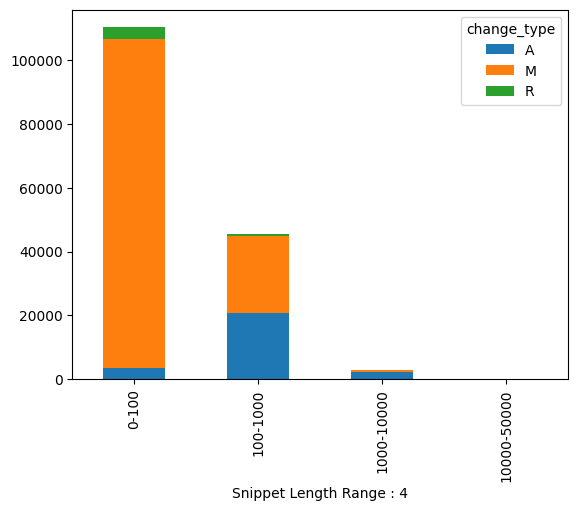

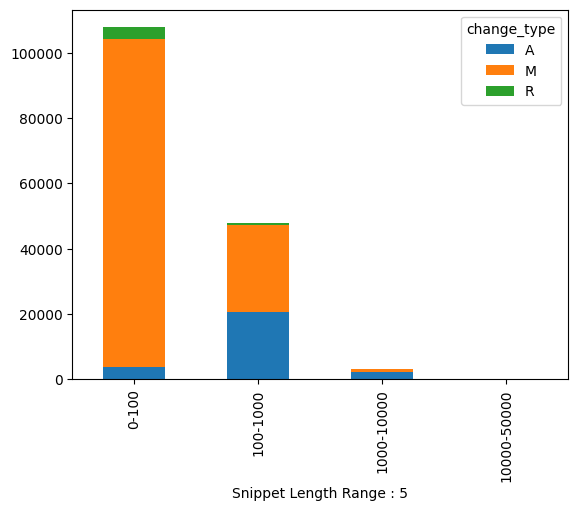

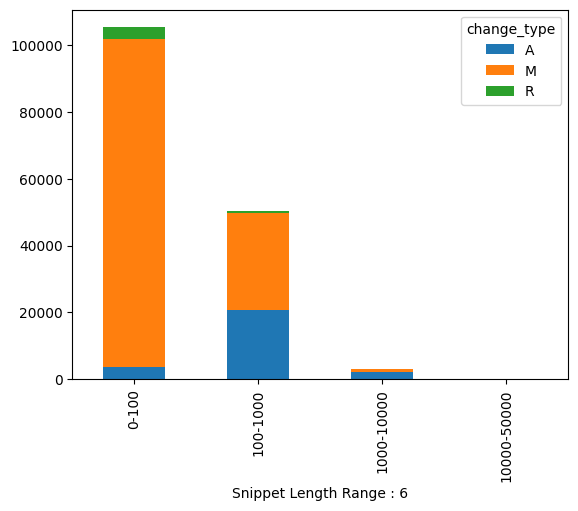

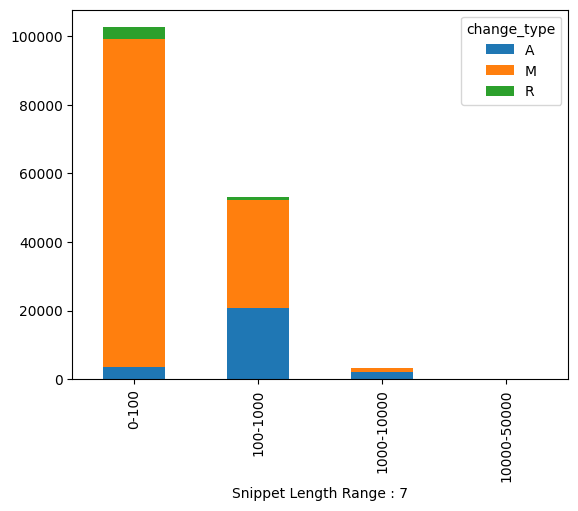

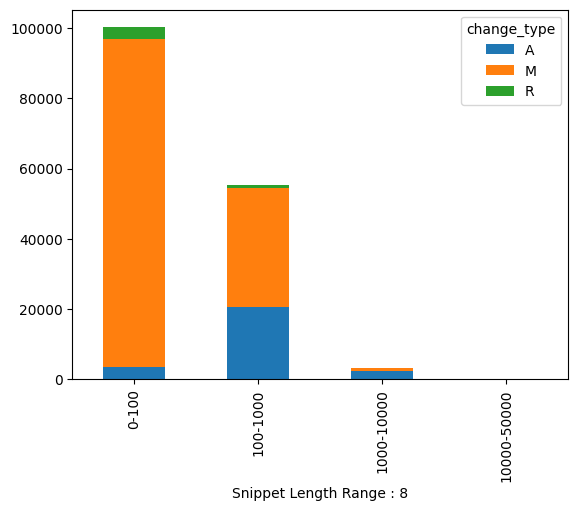

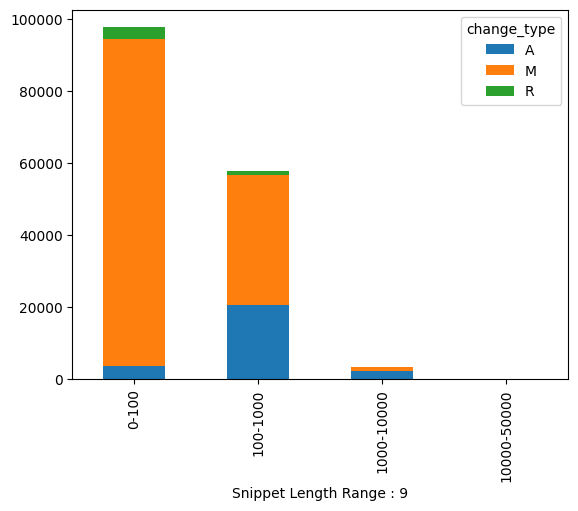

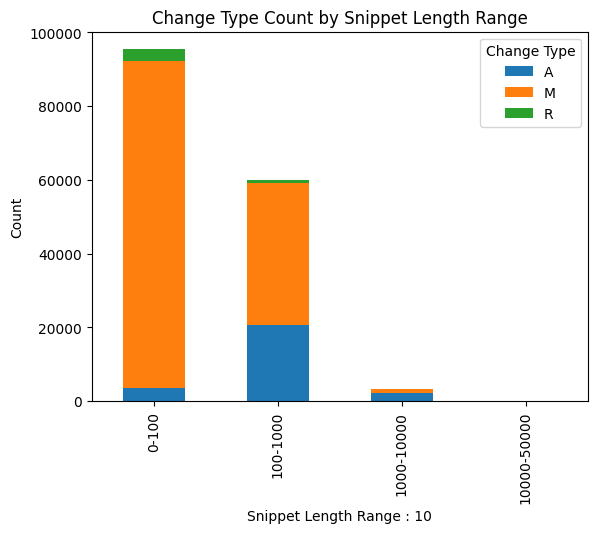

In [26]:
bins = [0, 100, 1000, 10000, 50000]
labels = ['0-100', '100-1000', '1000-10000', '10000-50000']  # 各範囲のラベル

for i , df2 in enumerate(df_list2):
    df2['snippet_length_range'] = pd.cut(df2['snippet_length'], bins=bins, labels=labels)

    # 範囲ごとのchange_typeの数を計算
    change_type_counts = df2.groupby(['snippet_length_range', 'change_type']).size().unstack()

    change_type_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Snippet Length Range : ' + str(i))


plt.ylabel('Count')
plt.title('Change Type Count by Snippet Length Range')
plt.legend(title='Change Type')

plt.show()